<a href="https://colab.research.google.com/github/jumbokh/Computer-Vision/blob/main/notebooks/%E8%89%B2%E7%90%83%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

專案結構規劃
數據集準備: 球類數據集存放於".\source_ball"路徑下，每種顏色的球至少有一張圖片。

共有9种不同颜色的乒乓球（红色、蓝色、绿色、黄色、紫色、橙色、黑色、白色和粉色）。
每种颜色的球在白色背景的桌子上被拍照，产生了原始图像。

图像处理: 使用Python和计算机视觉技术（OpenCV），您对这些原始图像进行了变形和旋转处理，为每种颜色的球生成了500张图像。並將圖檔存放於 ".\training_ball" 目錄
同時也產生了各500張的測試圖檔,並將圖檔存放於 ".\test_ball" 目錄

类别标识: 为这9种颜色的球定义了类别标识，{'red': 0, 'blue': 1, 'green': 2, 'yellow': 3, 'purple': 4, 'orange': 5, 'black': 6, 'white': 7, 'pink': 8}。

目标: 您的目标是使用这些图像作为训练集来训练一个机器学习模型。

並先使用 ".\test_ball" 目錄中的圖檔進行測試 , 若結果符合預期 (準確率大於 99.9%) , 再使用
笔记本电脑的摄像头来识别摆在镜头前的任何一种颜色的乒乓球。

期望的结果: 当一个乒乓球放在笔记本电脑摄像头前时，模型应能准确判断出乒乓球的颜色。

In [ ]:
# 載入必要的套件
import cv2
import os
import matplotlib.pyplot as plt

# 設定資料夾路徑
source_folder = './source_ball'
training_folder = './training_ball'
test_folder = './test_ball'

# 確認資料夾存在
if not os.path.exists(source_folder):
    print("Source folder not found. Please check the directory.")
else:
    print("Source folder ready for processing.")

# 檢視數據集中的文件
ball_images = os.listdir(source_folder)
print(f"Number of images in the dataset: {len(ball_images)}")
print("Sample images:", ball_images)


Source folder ready for processing.
Number of images in the dataset: 9
Sample images: ['white.jpg', 'yellow.jpg', 'red.jpg', 'black.jpg', 'orange.jpg', 'pink.jpg', 'purple.jpg', 'green.jpg', 'sky.jpg']


為了生成至少每種顏色的球各500張以上不重複的變形圖片，我們需要使用更複雜的變形技術，並實施一個隨機化過程以確保圖片的多樣性。我們可以使用如下方法：

隨機旋轉: 產生一個隨機角度來旋轉圖片。
隨機縮放: 改變圖片的大小。
隨機剪裁: 從圖片中剪裁出新的圖片。

加入隨機雜訊: 為圖片加入隨機雜訊以增加多樣性。
這裡會實現上述的一些圖片變形技術，並確保每種顏色的球至少有500張不重複的變形圖片

在生成圖片時，我們可以在檔名中包含這個標籤，以便於之後的追蹤。

現在讓我們修改程式碼來實現上述功能，並保證標籤（顏色）在檔名中得以保留。

In [ ]:
import cv2
import os
import numpy as np

# 設置隨機種子，以便結果可重現
np.random.seed(42)

def random_transformation(image):
    # 定義變換列表
    transformations = []

    # 隨機旋轉
    angle = np.random.randint(-180, 180)
    M_rotate = cv2.getRotationMatrix2D((image.shape[1]//2, image.shape[0]//2), angle, 1)
    rotated = cv2.warpAffine(image, M_rotate, (image.shape[1], image.shape[0]))
    transformations.append(rotated)

    # 隨機縮放
    scale = np.random.uniform(0.5, 1.5)
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    transformations.append(resized)

    # 隨機剪裁和縮放回原來大小
    x, y = np.random.randint(0, image.shape[1]//2), np.random.randint(0, image.shape[0]//2)
    w, h = np.random.randint(image.shape[1]//2, image.shape[1]), np.random.randint(image.shape[0]//2, image.shape[0])
    cropped = image[y:y+h, x:x+w]
    cropped_resized = cv2.resize(cropped, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_AREA)
    transformations.append(cropped_resized)

    # 加入隨機雜訊
    noise = np.random.randint(0, 50, (image.shape[0], image.shape[1], image.shape[2]), dtype='uint8')
    noisy_image = cv2.add(image, noise)
    transformations.append(noisy_image)

    return transformations

# 創建訓練圖片
def create_training_images(source_path, target_path, num_images_per_class):
    if not os.path.exists(target_path):
        os.makedirs(target_path)

    for img_name in os.listdir(source_path):
        img_path = os.path.join(source_path, img_name)
        image = cv2.imread(img_path)
        class_name = img_name.split('_')[0]  # 假設檔名格式為 "color_shapenumber.jpg"

        # 為每個類別生成指定數量的圖片
        i = 0
        while i < num_images_per_class:
            transformed_images = random_transformation(image)
            for trans_img in transformed_images:
                if i < num_images_per_class:
                    # 保存變換後的圖片
                    cv2.imwrite(os.path.join(target_path, f"{class_name}_{i}.png"), trans_img)
                    i += 1

# 對每種球進行至少500張變形 for training
create_training_images(source_folder, training_folder, 500)
print("Training images generation completed.")

# 對每種球進行至少500張變形 for test/confirm the training model
create_training_images(source_folder, test_folder, 500)
print("Testing images generation completed.")


Training images generation completed.


安裝 TensorFlow 在 Ubuntu 20.04 , 使用 "pip3 install tensorflow" 指令安裝

验证安装：安装完成后，您可以通过运行一个简单的TensorFlow程序来验证安装是否成功。在Python交互式环境中尝试以下命令：

In [ ]:
import tensorflow as tf
print(tf.__version__)


2023-12-25 17:48:21.596725: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-25 17:48:21.910164: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-25 17:48:21.912042: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-25 17:48:23.177329: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.13.1


修改加载和预处理函数：我们将修改函数以适应新的文件结构。下面的脚本将从文件名中提取颜色信息，并据此分配标签。

In [ ]:
import os
import cv2
import numpy as np

def load_and_preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (64, 64))  # 调整图像大小
    return image / 255.0  # 归一化像素值

def load_data(directory):
    images = []
    labels = []
    class_ids = {'red': 0, 'sky': 1, 'green': 2, 'yellow': 3, 'purple': 4,
                 'orange': 5, 'black': 6, 'white': 7, 'pink': 8}
    for file in os.listdir(directory):
        if file.endswith(".png"):
            label = file.split("_")[0]  # 从文件名提取颜色标签
            if label in class_ids:
                img_path = os.path.join(directory, file)
                img = load_and_preprocess_image(img_path)
                images.append(img)
                labels.append(class_ids[label])
    return np.array(images), np.array(labels)

# 调用函数加载数据
X_train, y_train = load_data('training_ball')


为了确认数据预处理步骤的正确性，您可以采取以下措施：

1. 打印数据形状
检查加载的图像和标签数组的形状。这可以帮助您确认是否正确加载了所有图像，并且每个图像都有一个相应的标签。

在load_data函数调用后加入以下代码：

In [ ]:
print("Loaded images shape:", X_train.shape)
print("Loaded labels shape:", y_train.shape)


Loaded images shape: (4500, 64, 64, 3)
Loaded labels shape: (4500,)


可视化一些图像
随机选择几张图像并将它们显示出来，以及它们对应的标签。这可以帮助您直观地确认图像是否被正确加载和处理。

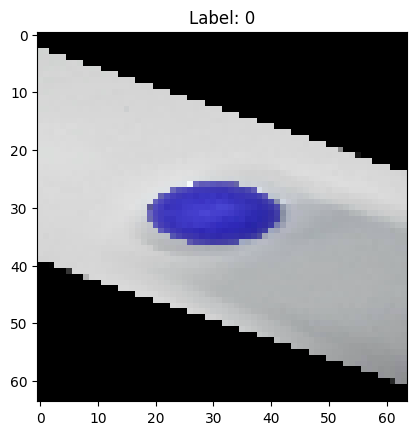

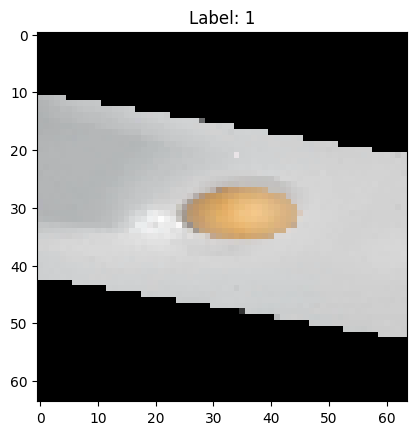

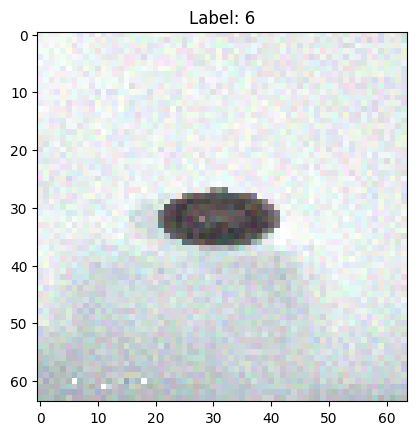

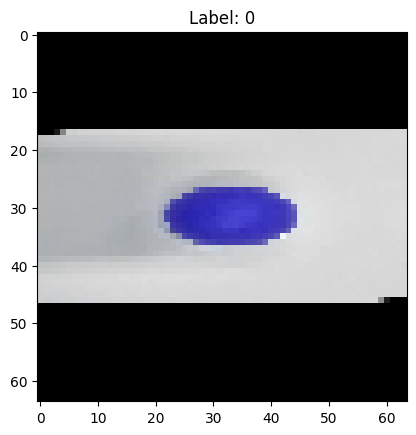

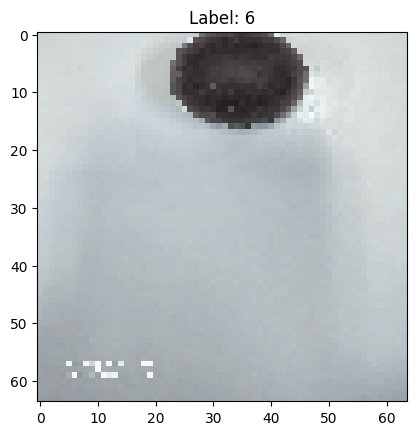

In [ ]:
import matplotlib.pyplot as plt

# 随机选择并显示几张图像
num_images_to_show = 5
for i in np.random.randint(0, len(X_train), num_images_to_show):
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.show()


检查标签分布
检查标签的分布，确保每个类别都被正确地标记，并且数据集中的类别是均衡的。

添加以下代码：

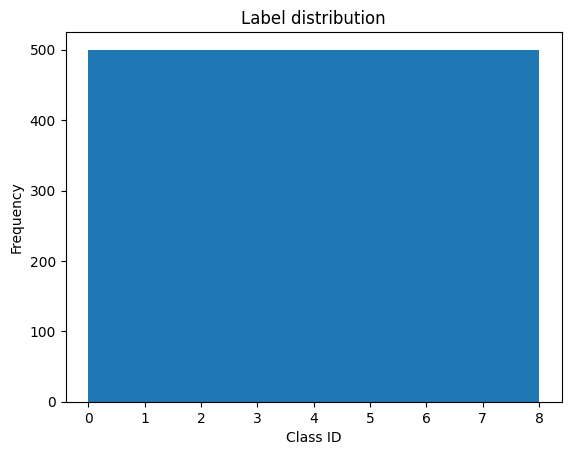

In [ ]:
import matplotlib.pyplot as plt

# 检查标签分布
plt.hist(y_train, bins=len(np.unique(y_train)))
plt.title("Label distribution")
plt.xlabel("Class ID")
plt.ylabel("Frequency")
plt.show()


构建机器学习模型
下一步是构建一个用于分类的机器学习模型。在这个案例中，使用卷积神经网络（CNN）是一个很好的选择，因为CNN在图像识别任务中表现出色。我们将使用TensorFlow和Keras来构建这个模型。

创建模型：创建一个简单的CNN模型，它由几个卷积层、池化层和全连接层组成。

编译模型：指定模型在训练时所需的损失函数、优化器和评估指标。

训练模型：使用预处理的图像数据训练模型。

下面是构建和训练模型的示例代码：

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 构建模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  # 9个类别
])

# 编译模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=30, validation_split=0.2)  # 使用20%的数据作为验证集

history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)


2023-12-25 19:14:47.623197: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-25 19:14:47.948327: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-25 19:14:47.950153: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-25 19:14:48.936729: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-25 19:14:50.620268: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


NameError: name 'X_train' is not defined

使用第一種參數進行訓練 , 發現訓練準確度會下降 , 不符合預期

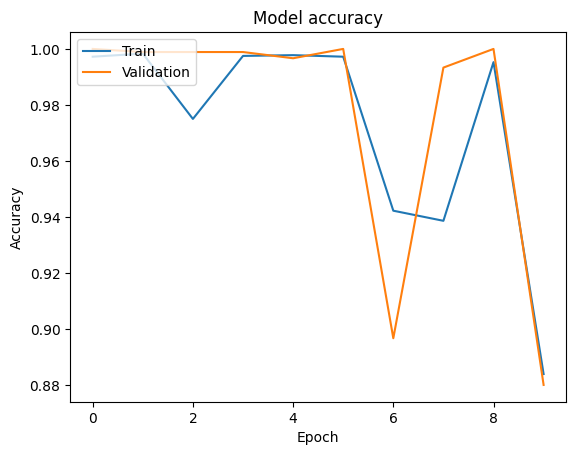

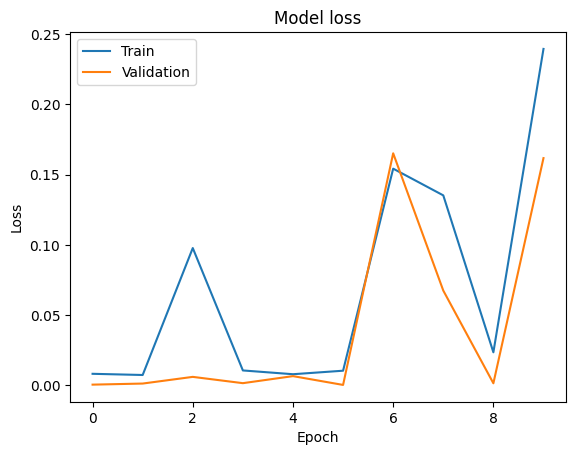

In [ ]:
import matplotlib.pyplot as plt

# 绘制训练和验证的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 绘制训练和验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


观察到训练准确度在一开始逐步上升，但随后降低，这可能是由几个因素造成的，如过拟合、不恰当的学习率或者数据集的问题。针对这些问题，可以尝试以下策略来调整参数，从而改善模型的表现：

1. 防止过拟合
增加Dropout：在模型中加入Dropout层可以帮助减少过拟合。可以尝试提高现有Dropout层的比例，或在其他层后面添加新的Dropout层。

数据增强：通过对训练数据应用随机变换（如旋转、缩放、平移等），可以生成更多多样化的训练样本，从而提高模型的泛化能力。

正则化：在卷积层和全连接层中应用L1或L2正则化可以帮助防止模型权重变得过大，从而减少过拟合。

2. 调整学习率
降低学习率：如果学习率过高，模型可能会在找到最优解之前就越过它。尝试降低学习率，看看是否能改善训练过程。

使用学习率衰减：随着训练的进行，逐渐降低学习率，这可以帮助模型在训练早期快速收敛，在后期则更细致地调整权重。

3. 检查数据
数据清洗：确保训练数据没有错误或不一致。错误的标签或低质量的图像可能会导致模型学习错误的特征。

数据平衡：检查各个类别的样本是否平衡。不平衡的数据集可能导致模型过分偏向样本数较多的类别。

4. 调整模型结构
减少模型复杂度：过于复杂的模型可能会导致过拟合。尝试减少层数或每层的神经元数量，以适应数据集的实际复杂性。

早停法（Early Stopping）：监控验证集的性能，当性能不再提升时停止训练。这可以防止模型在训练过程后期过拟合。

Epoch 1/50
113/113 [==============================] - 14s 119ms/step - loss: 2.1244 - accuracy: 0.2158 - val_loss: 1.9113 - val_accuracy: 0.4156
Epoch 2/50
113/113 [==============================] - 13s 119ms/step - loss: 1.5818 - accuracy: 0.4306 - val_loss: 1.1614 - val_accuracy: 0.8422
Epoch 3/50
113/113 [==============================] - 13s 117ms/step - loss: 1.0354 - accuracy: 0.6719 - val_loss: 0.6800 - val_accuracy: 0.8889
Epoch 4/50
113/113 [==============================] - 13s 118ms/step - loss: 0.6576 - accuracy: 0.8117 - val_loss: 0.3928 - val_accuracy: 0.9389
Epoch 5/50
113/113 [==============================] - 13s 119ms/step - loss: 0.4190 - accuracy: 0.8992 - val_loss: 0.2635 - val_accuracy: 0.9500
Epoch 6/50
113/113 [==============================] - 13s 118ms/step - loss: 0.2828 - accuracy: 0.9300 - val_loss: 0.1667 - val_accuracy: 0.9622
Epoch 7/50
113/113 [==============================] - 13s 119ms/step - loss: 0.2208 - accuracy: 0.9489 - val_loss: 0.1243 - val_ac

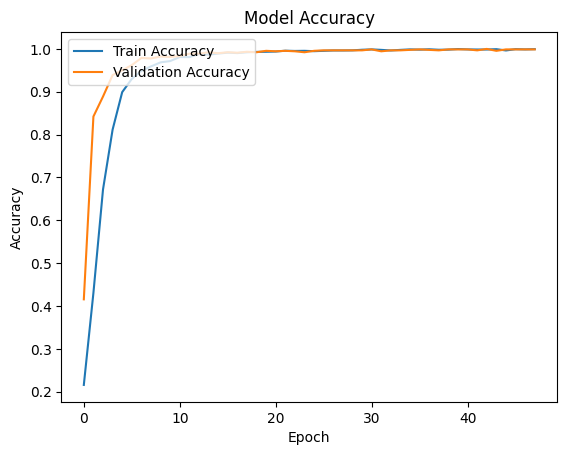

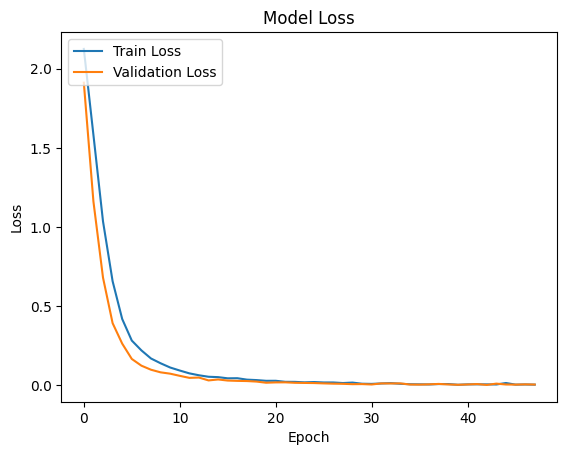

/home/poa/anaconda3/envs/cv2/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 构建模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # 增加Dropout层
    Dense(9, activation='softmax')  # 9个类别
])

# 编译模型，使用更低的初始学习率
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 早停法设置
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 训练模型，同时使用早停法
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# 可选：绘制训练和验证的准确率值和损失值
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


model.save('model_name.h5')


install sklearn module with below command "pip3 install scikit-learn"

and install seaborn module follow below command "pip3 install seaborn"

使用訓練好的訓練 model (model_name.h5) 進行測試 , 先以讀入圖檔的方式進行測試 , 每個色球各有500個任意變型的檔案,再將測試的結果製成圖表

/home/poa/anaconda3/envs/cv2/lib/python3.8/site-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


141/141 [==============================] - 8s 57ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       1.00      1.00      1.00       500
           5       1.00      1.00      1.00       500
           6       1.00      1.00      1.00       500
           7       1.00      1.00      1.00       500
           8       1.00      1.00      1.00       500

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



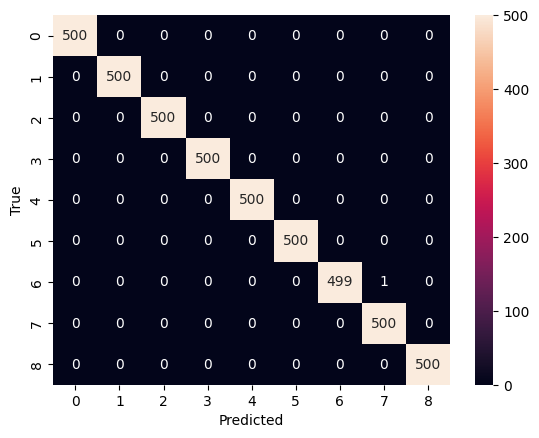

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 加载模型
model = load_model('model_name.h5')

# 加载测试数据
X_test, y_test = load_data('test_ball')  # 假设load_data函数与之前一样

# 使用模型进行预测
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# 打印分类报告
print(classification_report(y_test, y_pred_classes))

# 绘制混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


要使用 notebook web camera 前,必須安裝以下 package :
pip install ipywidgets
pip install opencv-python

使用 ubuntu 必須將 camera 的使用權限打開
sudo chmod 666 /dev/video0

使用 notebook web camera 進行判斷 , 並使用之前訓練的 model (model_name.h5) , 程式碼如下 :

In [ ]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from tensorflow.keras.models import load_model
import threading

# 加载模型
model = load_model('model_name.h5')  # 替换为您的模型文件路径

# 初始化摄像头
cap = cv2.VideoCapture(0)

# 创建一个图像显示widget
image_widget = widgets.Image(format='jpeg', width=400, height=300)

# 显示widget
display(image_widget)

# 控制摄像头读取的标志
is_camera_running = True

def process_image(frame):
    # 对frame进行预处理以适应模型的输入要求
    frame = cv2.resize(frame, (64, 64))  # 调整图像大小
    frame = frame / 255.0  # 归一化
    frame = np.expand_dims(frame, axis=0)  # 增加一个维度，因为模型预期批处理输入
    return frame

def predict_color(frame):
    predictions = model.predict(frame)
    predicted_class = np.argmax(predictions, axis=1)
    class_ids = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple', 5: 'orange', 6: 'black', 7: 'white', 8: 'pink'}
    color = class_ids[predicted_class[0]]
    return color

def update_image(frame):
    processed_frame = process_image(frame)
    color = predict_color(processed_frame)
    cv2.putText(frame, color, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    return frame

def get_frame():
    global is_camera_running
    if not is_camera_running:
        return

    ret, frame = cap.read()
    if ret:
        frame = update_image(frame)
        _, jpeg_frame = cv2.imencode('.jpeg', frame)
        image_widget.value = jpeg_frame.tobytes()
        threading.Timer(0.1, get_frame).start()

def stop_camera():
    global is_camera_running
    is_camera_running = False
    cap.release()
    cv2.destroyAllWindows()

get_frame()  # 启动摄像头读取

# 创建停止摄像头的按钮
stop_button = widgets.Button(description="Stop Camera")
stop_button.on_click(lambda x: stop_camera())
display(stop_button)


2023-12-25 17:49:29.057606: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Image(value=b'', format='jpeg', height='300', width='400')

1/1 [==============================] - 0s 134ms/step


Button(description='Stop Camera', style=ButtonStyle())

1/1 [==============================] - 0s 31ms/step
